In [1]:
import tensorflow as tf

# MNIST 데이터셋 로드
mnist = tf.keras.datasets.mnist

# 훈련 데이터와 테스트 데이터로 분할
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [2]:
# 픽셀 값을 0에서 1 사이로 정규화
x_train = x_train / 255.0
x_test = x_test / 255.0

In [3]:
# 채널 차원 추가 (흑백 이미지이므로 채널 수는 1)
x_train = x_train[..., tf.newaxis]
x_test = x_test[..., tf.newaxis]

In [4]:
batch_size = 32

# tf.data API를 사용하여 배치 데이터 생성
train_ds = tf.data.Dataset.from_tensor_slices((x_train, y_train)).shuffle(10000).batch(batch_size)
test_ds = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(batch_size)

In [5]:
from tensorflow.keras import layers, models

# 모델 초기화
model = models.Sequential()

# 첫 번째 합성곱 레이어
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
# 첫 번째 풀링 레이어
model.add(layers.MaxPooling2D((2, 2)))

# 두 번째 합성곱 레이어
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
# 두 번째 풀링 레이어
model.add(layers.MaxPooling2D((2, 2)))

# 완전 연결 레이어를 위한 Flatten
model.add(layers.Flatten())

# 완전 연결 레이어
model.add(layers.Dense(64, activation='relu'))

# 출력 레이어
model.add(layers.Dense(10, activation='softmax'))

/Users/jy/SKN23/multimodal/multi_venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
# 모델 구조 출력
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 121,930 (476.29 KB)

 Trainable params: 121,930 (476.29 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
model.compile(
    optimizer='adam',                        # optimizer: 가중치를 업데이트하여 오차를 줄이는 최적화 알고리즘 (Adam: 가장 보편적이고 효율적임)
    loss='sparse_categorical_crossentropy',  # loss: 훈련 데이터에 대한 모델의 오차를 계산하는 손실 함수 (정수 형태의 다중 분류 레이블에 사용)
    metrics=['accuracy']                     # metrics: 모델의 성능을 평가하기 위해 훈련 및 테스트 시 모니터링할 지표 (정확도)
)


In [8]:
# 모델 학습
model.fit(train_ds, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 26s 13ms/step - accuracy: 0.9570 - loss: 0.1449
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - accuracy: 0.9851 - loss: 0.0483
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.9892 - loss: 0.0348
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.9920 - loss: 0.0250
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.9938 - loss: 0.0195


In [9]:
# 모델 평가
test_loss, test_acc = model.evaluate(test_ds)
print('테스트 정확도:', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9899 - loss: 0.0305
테스트 정확도: 0.9898999929428101


In [10]:
import numpy as np

# 첫 번째 테스트 이미지에 대한 예측 수행
test_image = np.expand_dims(x_test[0], axis=0)   # 이미지 선택 및 배치 차원 추가
prediction = model.predict(test_image, verbose=0) # 모델 예측 실행
pred_label = np.argmax(prediction)               # 최댓값 인덱스(레이블) 추출

print(f"예측된 레이블: {pred_label}")             # 예측 결과 출력
print(f"실제 레이블: {y_test[0]}")               # 실제 정답 출력


예측된 레이블: 7
실제 레이블: 7


필터 크기: (3, 3, 1, 32)


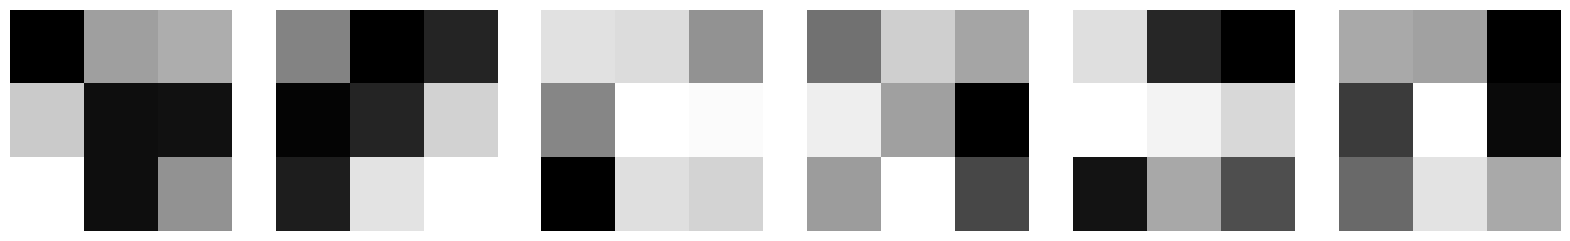

In [11]:
# 첫 번째 합성곱 레이어의 가중치 가져오기
filters, biases = model.layers[0].get_weights()
print('필터 크기:', filters.shape)  # (3, 3, 1, 32)

# 필터 시각화
import matplotlib.pyplot as plt

n_filters = 6  # 시각화할 필터 수
fig, axes = plt.subplots(1, n_filters, figsize=(20, 5))
for i in range(n_filters):
    f = filters[:, :, :, i]
    axes[i].imshow(f[:, :, 0], cmap='gray')
    axes[i].axis('off')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


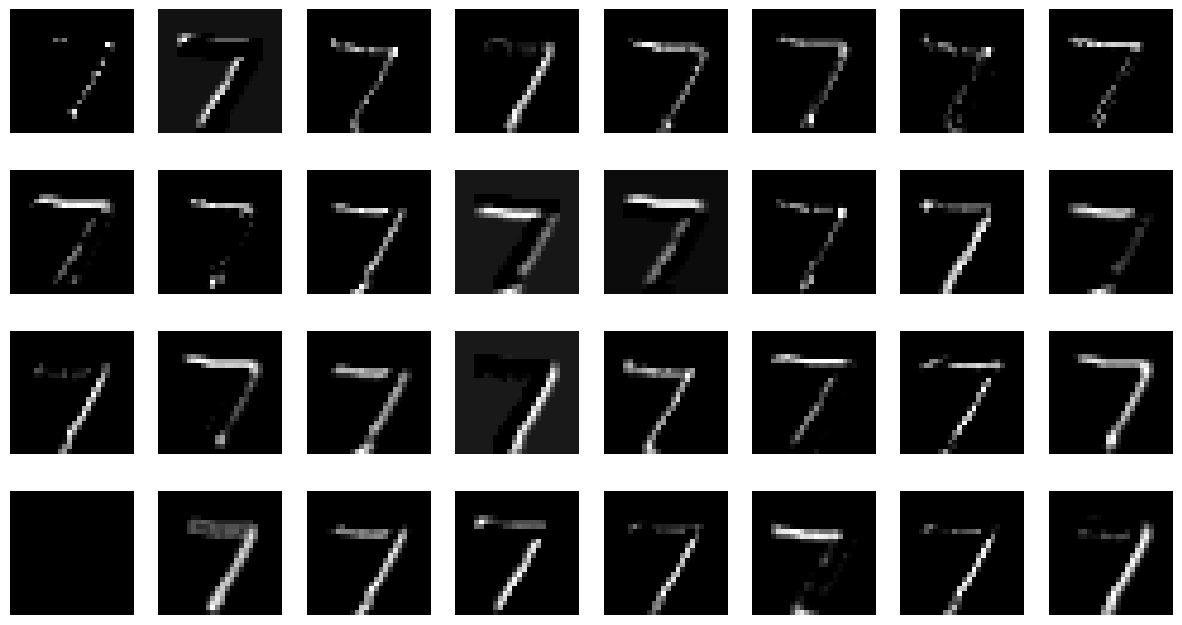

In [12]:
# 특정 레이어의 출력 가져오기
from tensorflow.keras import Model

# 부분 모델 정의 (첫 번째 합성곱 레이어의 출력까지)
partial_model = Model(inputs=model.inputs, outputs=model.layers[0].output)

# 입력 이미지 선택
input_image = x_test[0]
input_image = np.expand_dims(input_image, axis=0)  # 배치 차원 추가

# 특징 맵 계산
feature_maps = partial_model.predict(input_image)

# 특징 맵 시각화
fig, axes = plt.subplots(4, 8, figsize=(15, 8))
axes = axes.flatten()
for i in range(32):  # 첫 번째 합성곱 레이어의 출력 채널 수
    axes[i].imshow(feature_maps[0, :, :, i], cmap='gray')
    axes[i].axis('off')
plt.show()

In [ ]:

from tensorflow.keras.preprocessing.image import ImageDataGenerator  # ImageDataGenerator 임포트

datagen = ImageDataGenerator(       # 데이터 증강 설정 객체 생성
    rotation_range=10,              # 이미지 회전 범위 (10도)
    zoom_range=0.1,                 # 이미지 확대/축소 범위 (10%)
    horizontal_flip=True            # 좌우 반전 활성화
)

model.fit(                                           # 모델 학습 수행
    datagen.flow(x_train, y_train, batch_size=32),   # 증강된 데이터 스트림 생성
    epochs=5,                                        # 학습 반복 횟수 설정
    validation_data=(x_test, y_test)                 # 검증 데이터셋 지정
)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 38s 20ms/step - accuracy: 0.9635 - loss: 0.1182 - val_accuracy: 0.9862 - val_loss: 0.0422
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 28s 15ms/step - accuracy: 0.9805 - loss: 0.0612 - val_accuracy: 0.9846 - val_loss: 0.0485
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 29s 15ms/step - accuracy: 0.9839 - loss: 0.0517 - val_accuracy: 0.9859 - val_loss: 0.0453
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 26s 14ms/step - accuracy: 0.9860 - loss: 0.0446 - val_accuracy: 0.9882 - val_loss: 0.0381
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.9877 - loss: 0.0394 - val_accuracy: 0.9824 - val_loss: 0.0589


In [ ]:
# ImageDataGenerator 사용법
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# ImageDataGenerator 인스턴스 생성
datagen = ImageDataGenerator(
    rotation_range=40,        # 회전 범위
    width_shift_range=0.2,    # 가로 이동 범위
    height_shift_range=0.2,   # 세로 이동 범위
    shear_range=0.2,          # 시어 변환 범위
    zoom_range=0.2,           # 줌 범위
    horizontal_flip=True,     # 수평 반전
    fill_mode='nearest'       # 채움 방식
)

In [15]:
# 증강된 이미지 생성기
train_datagen = ImageDataGenerator(
    rescale=1./255,           # 픽셀 값 스케일링
    rotation_range=30,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)

# 테스트 데이터는 증강하지 않음
test_datagen = ImageDataGenerator(rescale=1./255)